In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class Particle:
    def __init__(self, position, velocities):
        self.position = position
        self.velocities = velocities
        self.fitness = 0
        self.best_position = self.position
        self.best_fitness = self.fitness
        self.is_best = True

    # Evaluate fitness of the particle and set best fitness and position(local max)
    def evaluate_fitness(self):
        self.fitness = 0
        for i in range(0,len(self.position)-1):
            self.fitness += 100*(self.position[i+1] - self.position[i])**2 + (self.position[i] - 1)**2
        if self.fitness > self.best_fitness:
            self.best_fitness = self.fitness
            self.best_position = self.position
            self.is_best = True
        else:
            self.is_best = False

In [3]:
class Swarm:
    def __init__(self, options):
        self.dimension = 0
        self.n_particles = 0
        self.population = []
        self.best_particle = None
        self.options = options
        self.fitness_graph = []
        self.generate_population()

    # Generate initial swarm population
    def generate_population(self):
        self.n_particles = int(input("Enter swarm size: "))
        self.dimension = int(input("Enter dimension: "))
        print(f"\nSwarm Size: {self.n_particles}\nDimension: {self.dimension}")
        self.population = []
        for i in range(self.n_particles): 
            position = np.random.standard_normal(size=self.dimension).tolist()
            velocities = [0] * self.dimension
            self.population.append(Particle(position, velocities))
        self.best_particle = random.choice(self.population)

    # Evaluate Fitness of the swarm and set best pasition of the swarm (global max)
    def evaluate_fitness(self):
        for particle in self.population:
            particle.evaluate_fitness()
            if particle.is_best:
                if particle.fitness > self.best_particle.fitness:
                    self.best_particle = particle
        self.fitness_graph.append(self.best_particle.fitness)
        print(f"\nGlobal Best Particle: {self.best_particle.position}, Fitness: {self.best_particle.fitness}")
    
    # Update velocity and position of the particles in the swarm
    def update_swarm(self):
        global_best_position = self.best_particle.position
        r1 = random.uniform(0, 1)
        r2 = random.uniform(0, 1)
        for particle in self.population:
            for i, velocity in enumerate(particle.velocities):
                cognitive_component = self.options['c1']*r1*(particle.best_position[i]-particle.position[i])
                social_component = self.options['c2']*r2*(global_best_position[i]-particle.position[i])
                velocity = self.options['w']*velocity + cognitive_component + social_component
                particle.position[i] = particle.position[i] + velocity

    def damp_weight(self):
        if self.options['w'] > 0.4:
            self.options['w'] = self.options['w']*self.options['w_damp']
                
    # Check for termination
    def terminate(self):
        if len(self.fitness_graph) > 5:
            if len(set(self.fitness_graph[-5:])) == 1:
                return True
        return False
            
    # Plotting graph to show fitness trend
    def plot_graph(self):
        plt.plot(self.fitness_graph)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Best particle fitness")

In [4]:
def optimize(max_iter=100):
    options = {'c1': 2, 'c2': 2, 'w':0.9, 'w_damp':0.99}
    swarm = Swarm(options)
    for i in range(max_iter):
        swarm.evaluate_fitness()
        swarm.update_swarm()
        swarm.damp_weight()
        if swarm.terminate():
            break
    print(f"Total Iterations: {i}")
    swarm.plot_graph()

Enter swarm size: 10
Enter dimension: 10

Swarm Size: 10
Dimension: 10

Global Best Particle: [-1.4373314154769283, 1.6419177977526698, 0.37558995942715667, 1.2876558743707425, 0.06150545082895592, 1.7162247602936616, -1.984909836326678, 0.6637343243155169, -1.4296928368012067, 1.477153888650815], Fitness: 4993.612730725556

Global Best Particle: [-1.4373314154769283, 1.6419177977526698, 0.37558995942715667, 1.2876558743707425, 0.06150545082895592, 1.7162247602936616, -1.984909836326678, 0.6637343243155169, -1.4296928368012067, 1.477153888650815], Fitness: 4993.612730725556

Global Best Particle: [-2.02442759624613, 2.471372994424139, 1.0480239944109893, 1.4500758948212762, 0.6749586932104439, 3.214730252341353, -2.7944726712788226, 0.6121203390145755, -2.4787914956956074, 1.885688123191816], Fitness: 10620.063254585226

Global Best Particle: [-2.02442759624613, 2.471372994424139, 1.0480239944109893, 1.4500758948212762, 0.6749586932104439, 3.214730252341353, -2.7944726712788226, 0.6121

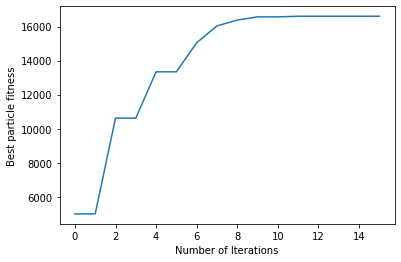

In [5]:
optimize()